In [ ]:
cd ..

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from lib import estimator_util as eu
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import numpy as np
from lib import clusters_utils as cl

In [ ]:
sns.set_theme()

In [ ]:
complete_df, all_cols = eu.get_data("../data/lsms/processed/_all_real.csv", "../data/cnn_features/resnet_trans_all_countries_hyper.csv", "../data/")

In [ ]:
all_cols

In [ ]:
countries = ["NG", "ETH" ,"TZA", "MW"]

# Study OSM feature importance with PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, random_state=1)
_ = pca.fit(complete_df[all_cols])
features_weights = list(zip(all_cols, pca.components_.T))

In [ ]:
features_weights

# Study OSM features for every countries at once

In [13]:
X, y, year_df, osm_X = eu.get_recent_osm_features(complete_df, countries, all_cols)

### With OSM features non standardized

In [14]:
osm_X = pd.DataFrame(osm_X, columns = all_cols)

In [15]:
osm_X.describe()

,building_count,building_area,building_density,residential_count,residential_area,residential_density,industry_count,industry_area,industry_density,education_count,...,density_trunk,density_residential,density_pedestrian,density_service,density_primary,density_intersection,density_secondary,density_living_street,density_track,density_tertiary
count,708.000000,7.080000e+02,708.000000,708.000000,7.080000e+02,708.000000,708.0,708.0,708.0,708.000000,...,708.000000,708.000000,708.000000,708.000000,708.000000,708.0,708.000000,708.000000,708.000000,708.000000
mean,4233.816384,3.406160e+05,8084.409195,50.451977,3.057171e+06,72582.430071,0.0,0.0,0.0,1.415254,...,67.339506,1458.442218,0.008658,40.726172,14.865395,0.0,48.709703,0.011949,389.658291,148.130636
std,8958.123950,8.079813e+05,19190.899574,154.444267,6.092496e+06,144489.825119,0.0,0.0,0.0,3.300147,...,98.133517,1483.056368,0.230380,112.014788,45.307875,0.0,79.831634,0.271914,787.620345,152.854962
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,537.735000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,8.495000,0.000000
50%,257.000000,1.537306e+04,365.385000,3.000000,2.135521e+05,5112.465000,0.0,0.0,0.0,0.000000,...,0.000000,1017.640000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,112.145000,120.565000
75%,3289.250000,1.533974e+05,3702.365000,34.000000,2.624780e+06,62137.725000,0.0,0.0,0.0,1.000000,...,154.785000,1695.800000,0.000000,7.965000,0.000000,0.0,84.457500,0.000000,509.765000,235.752500
max,50720.000000,4.662329e+06,110327.160000,1683.000000,3.801784e+07,899636.300000,0.0,0.0,0.0,24.000000,...,788.680000,8327.110000,6.130000,860.700000,278.470000,0.0,426.110000,7.110000,10142.040000,753.860000


### With OSM features standardized

In [16]:
X = pd.DataFrame(X, columns = all_cols)

In [17]:
#get the name of features filled with null values for all four countries
null_features = X.loc[:, (X == 0).any(axis=0)].keys()
print(null_features)

Index(['industry_count', 'industry_area', 'industry_density', 'hostel',
       'furniture_shop', 'water_works', 'tourist_info', 'laundry',
       'water_tower', 'tower', 'gift_shop', 'mobile_phone_shop', 'hotel',
       'car_dealership', 'computer_shop', 'bakery', 'toilet', 'clothes',
       'park', 'department_store', 'supermarket', 'chalet', 'memorial',
       'travel_agent', 'track', 'guesthouse', 'monument', 'graveyard', 'motel',
       'greengrocer', 'mall', 'playground', 'chemist', 'picnic_site',
       'doityourself', 'comms_tower', 'convenience', 'viewpoint', 'butcher',
       'museum', 'bookshop', 'camp_site', 'water_well', 'bicycle_shop',
       'outdoor_shop', 'camera_surveillance', 'sports_shop', 'stationery',
       'sports_centre', 'attraction', 'florist', 'artwork', 'jeweller',
       'stadium', 'hairdresser', 'beauty_shop', 'beverages', 'town_hall',
       'others', 'toy_shop', 'kiosk', 'shoe_shop', 'count_intersection',
       'length_intersection', 'density_intersecti

In [18]:
#remove all features filled with 0
X = X.loc[:, (X != 0).any(axis=0)]

In [19]:
X.describe()

,building_count,building_area,building_density,residential_count,residential_area,residential_density,education_count,education_area,education_density,health_count,...,length_tertiary,density_trunk,density_residential,density_pedestrian,density_service,density_primary,density_secondary,density_living_street,density_track,density_tertiary
count,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,...,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03
mean,-7.368658e-16,-8.656981e-16,1.427367e-15,-1.103012e-15,-3.062309e-16,2.575921e-16,-3.186568e-16,7.130666e-16,-2.307318e-17,8.463636e-16,...,-1.756805e-16,-1.243024e-15,5.532361e-17,2.927040e-16,-9.673072e-16,-1.838771e-15,1.732993e-15,-6.614030e-17,3.041317e-16,-1.789279e-15
std,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,...,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00
min,-2.741644e-01,-3.076249e-01,-3.059018e-01,-2.412358e-01,-4.773578e-01,-4.784063e-01,-2.395172e-01,-2.349695e-01,-2.348718e-01,-2.776115e-01,...,-8.076601e-01,-5.669686e-01,-6.064124e-01,-6.313024e-02,-3.511242e-01,-3.531864e-01,-5.046394e-01,-4.570284e-02,-3.189416e-01,-8.121570e-01
25%,-2.741644e-01,-3.076249e-01,-3.059018e-01,-2.412358e-01,-4.773578e-01,-4.784063e-01,-2.395172e-01,-2.349695e-01,-2.348718e-01,-2.776115e-01,...,-8.076601e-01,-5.669686e-01,-6.064124e-01,-6.313024e-02,-3.511242e-01,-3.531864e-01,-5.046394e-01,-4.570284e-02,-3.189416e-01,-8.121570e-01
50%,-2.739828e-01,-3.072294e-01,-3.055180e-01,-2.301748e-01,-4.746314e-01,-4.757137e-01,-2.395172e-01,-2.349695e-01,-2.348718e-01,-2.776115e-01,...,-2.948903e-01,-5.669686e-01,-4.287159e-01,-6.313024e-02,-3.511242e-01,-3.531864e-01,-5.046394e-01,-4.570284e-02,-3.009971e-01,-2.950449e-01
75%,-2.291744e-01,-2.248893e-01,-2.249073e-01,-1.416864e-01,-1.124389e-01,-1.134394e-01,-1.348994e-01,-2.349695e-01,-2.348718e-01,-1.020766e-01,...,4.381770e-01,5.945274e-01,3.765931e-02,-6.313024e-02,-2.498449e-01,-1.282504e-02,2.518738e-01,-4.570284e-02,-8.463724e-02,4.384761e-01
max,8.936299e+00,1.015308e+01,9.769922e+00,1.837450e+01,6.114982e+00,6.004509e+00,1.388388e+01,1.167167e+01,1.135517e+01,1.148323e+01,...,8.281263e+00,6.622972e+00,6.250190e+00,1.878703e+01,9.883539e+00,1.220056e+01,1.283733e+01,4.001663e+01,2.112996e+01,8.241919e+00


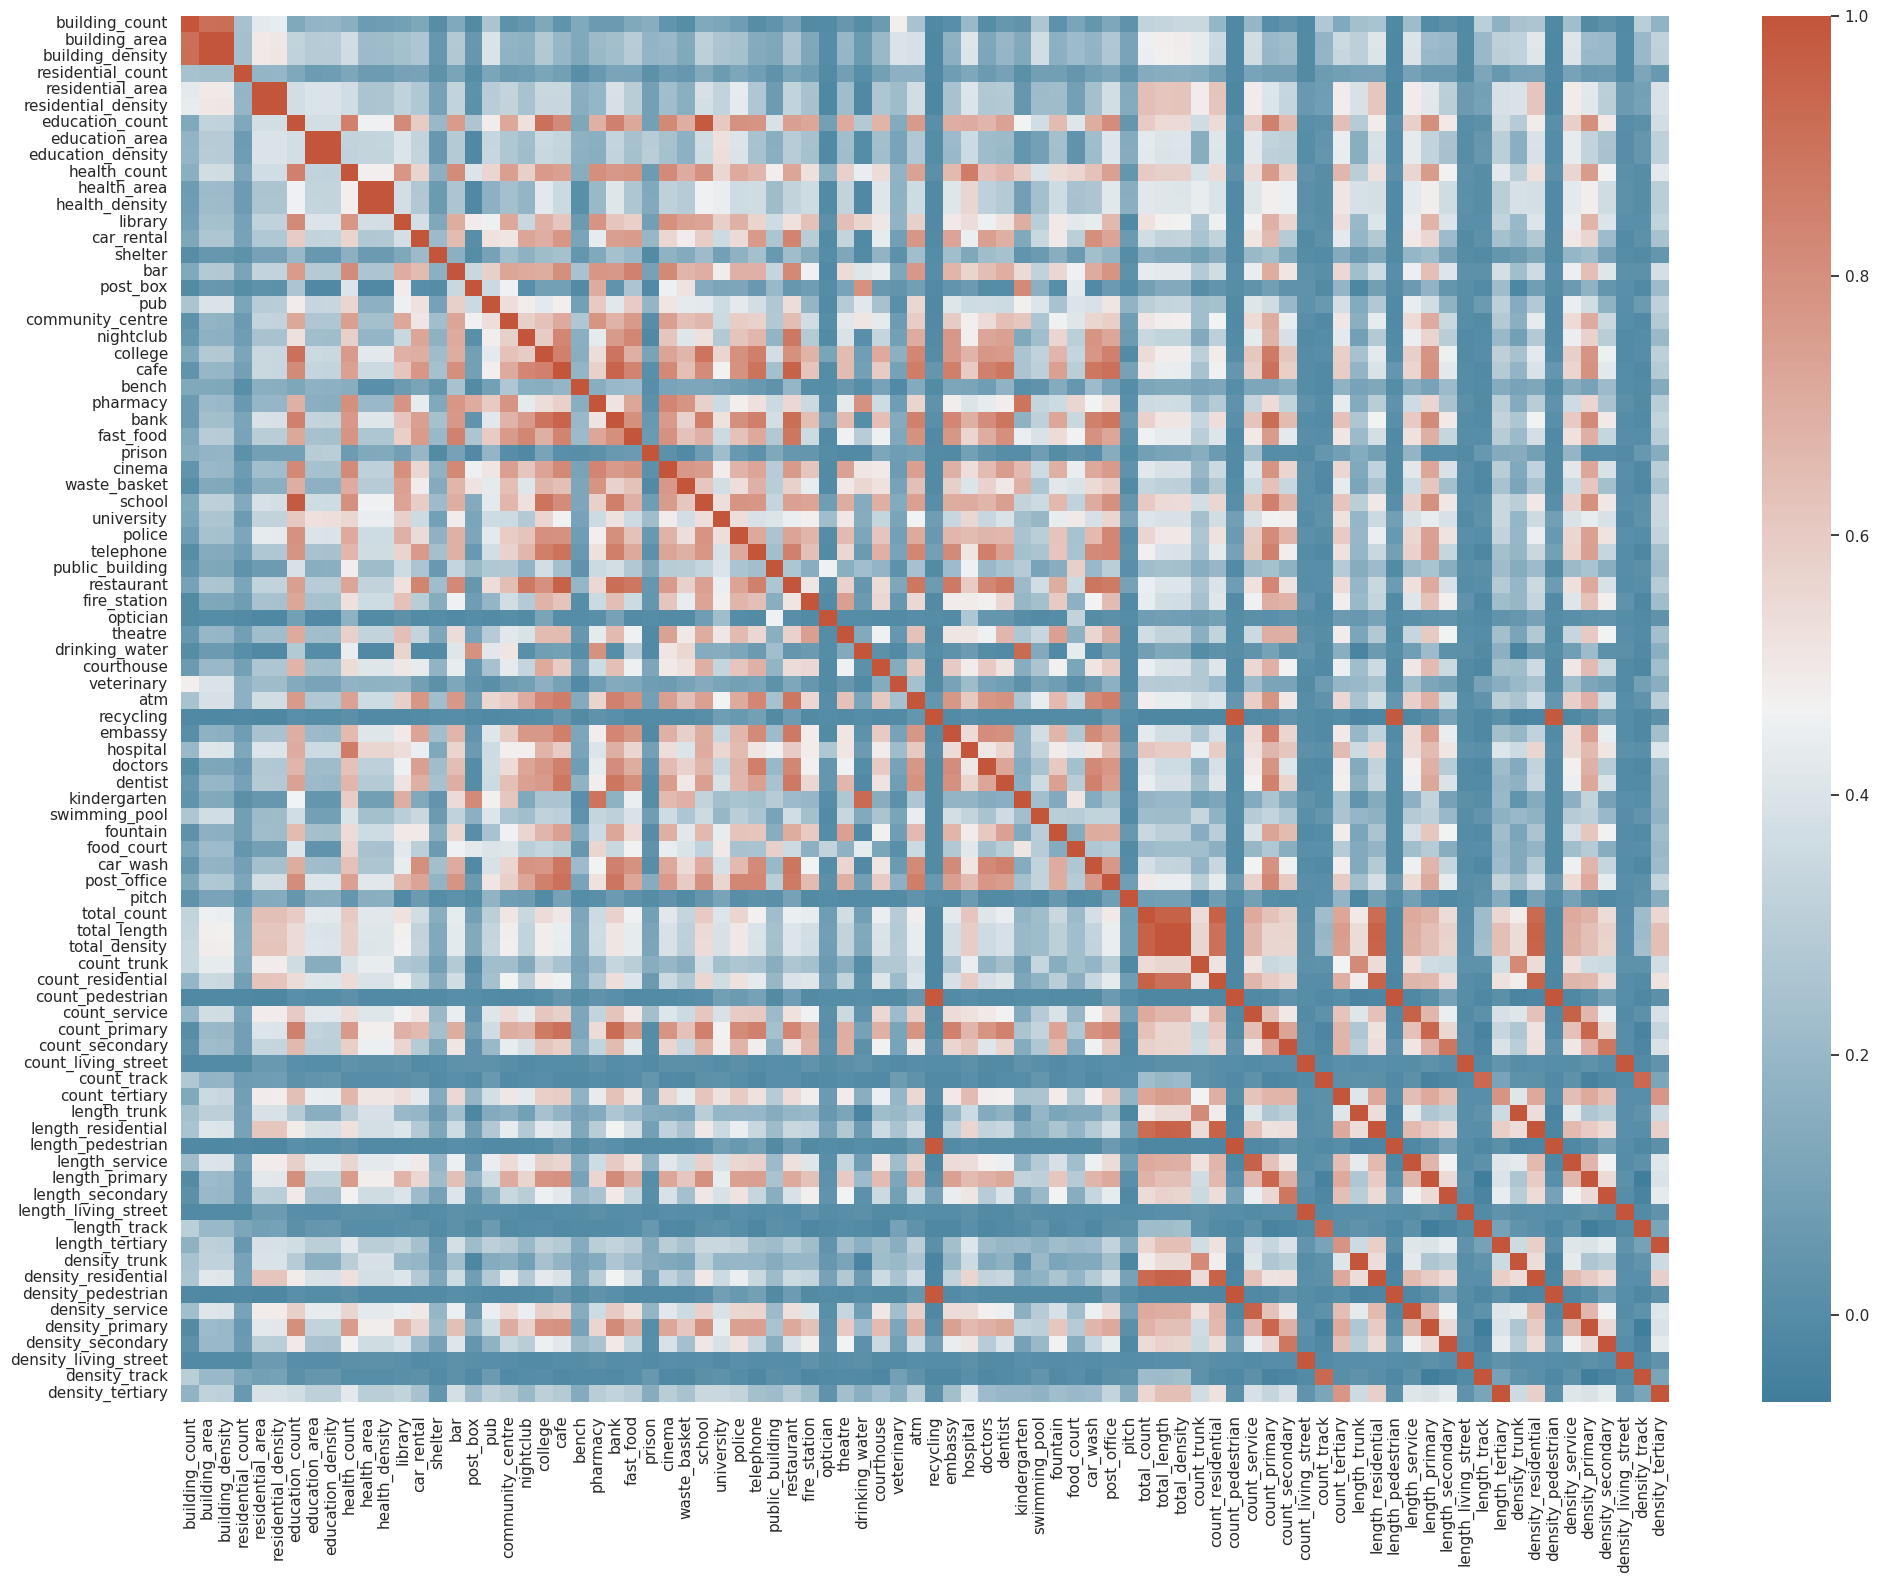

In [20]:
corr = X.corr()
f, ax = plt.subplots(figsize=(24, 18))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#sns_plot = sns.heatmap(corr, cmap=cmap, annot=True, fmt='.2f', annot_kws={'size': 3})
sns_plot = sns.heatmap(corr, cmap=cmap)
sns_plot.figure.savefig("heatmap.png", dpi = 300)

# Study OSM features for each country

In [ ]:
for i, country in enumerate(countries):
    print(country)
    X, y, year_df, osm_X = eu.get_recent_osm_features(complete_df, [country], all_cols)
    osm_X = pd.DataFrame(osm_X, columns = all_cols)
    display(osm_X.describe())
    #remove all features filled with 0
    X = pd.DataFrame(X, columns = all_cols)
    X = X.loc[:, (X != 0).any(axis=0)]

    #create correlation plot
    corr = X.corr()
    f, ax = plt.subplots(figsize=(24, 18))
    ax.set_title(country)
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns_plot = sns.heatmap(corr, cmap=cmap)
    sns_plot.figure.savefig("heatmap_"+ country + ".png", dpi = 300)

In [25]:
def accuracy_pca(complete, country, model_, withOSM = True, **params) : 
    r2s = []

    if withOSM :
        principal_components = np.arange(2,84, step = 2)
    else :
        principal_components = np.arange(2,419, step = 5)
    for pc in principal_components : 
        tmp_df = complete.loc[complete.country == country]
        years = tmp_df.groupby(["year"]).groups.keys()
        year = max(years)
        if withOSM :
            X, y, _, _ = eu.get_recent_osm_features(tmp_df, [country], all_cols, null_osm_features=null_features, pca_comp = pc)
        else :
            X, y = eu.get_recent_features(tmp_df, [country], all_cols, pca_comp_osm = 0, pca_comp_cnn = pc)
        recent_df_complete = tmp_df.loc[tmp_df.year == year]
        split_map = cl.split_k_sets(10, lat=recent_df_complete["lat"], lon=recent_df_complete["lon"])
        r2, _, _, _ = eu.run_model(X, y, model_, seed=1, kf= cl.folds_from_split(split_map), **params)
        r2s.append(r2)
        
    fig = plot_accuracy(r2s, principal_components, country, year)
    fig.savefig(f"../figs/{country}_{year}_pca_accuracy_{model_.__name__}.pdf", dpi=600)
        
def plot_accuracy(r2s: np.array, principal_components : np.array, country: str, year: str) :
    fig = plt.figure(figsize=(9, 6))
    plt.plot(principal_components, r2s)

    plt.xlabel('Nb of principal components', fontsize=14)
    plt.ylabel('Accuracy of the prediction (r^2)', fontsize=14)
    plt.suptitle(f'{country} {year}', ha="left", x=0.119, y=0.95, fontsize=18)
    plt.grid(alpha=1)

    return fig

In [22]:
for country in tqdm(countries) :
    accuracy_pca(complete_df, country, Ridge, alpha = 1000)

  0%|          | 0/4 [00:00<?, ?it/s]


TypeError: get_recent_osm_features() got an unexpected keyword argument 'pca_comp'

100%|██████████| 4/4 [00:26<00:00,  6.61s/it]


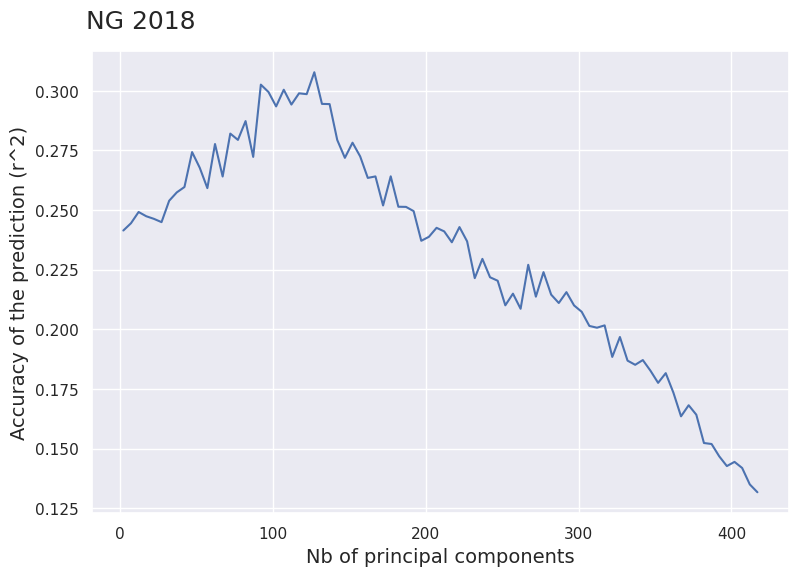

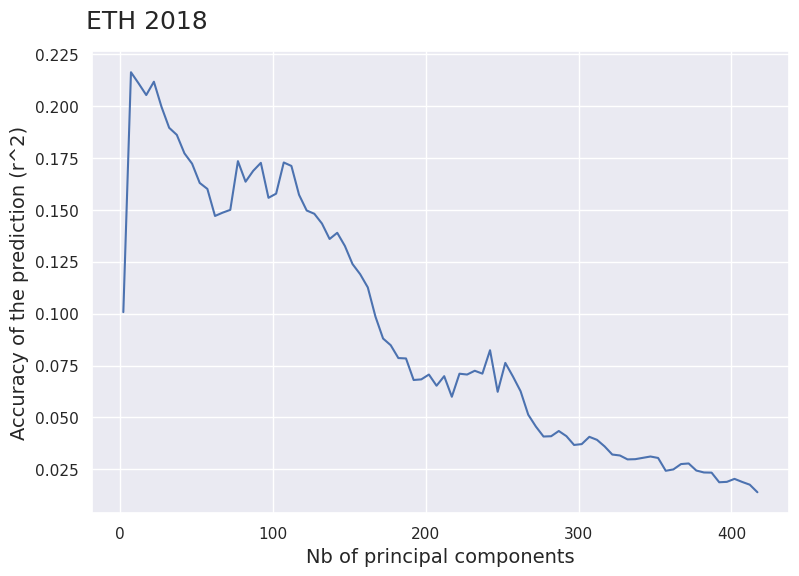

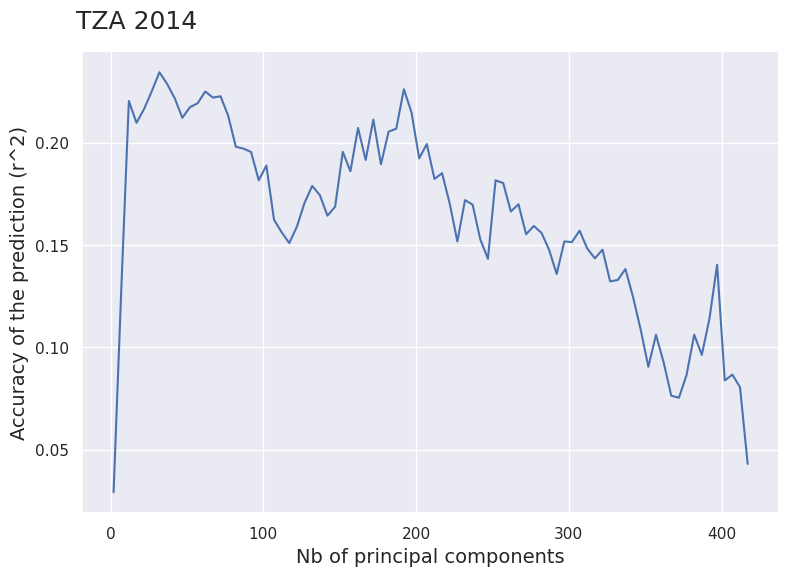

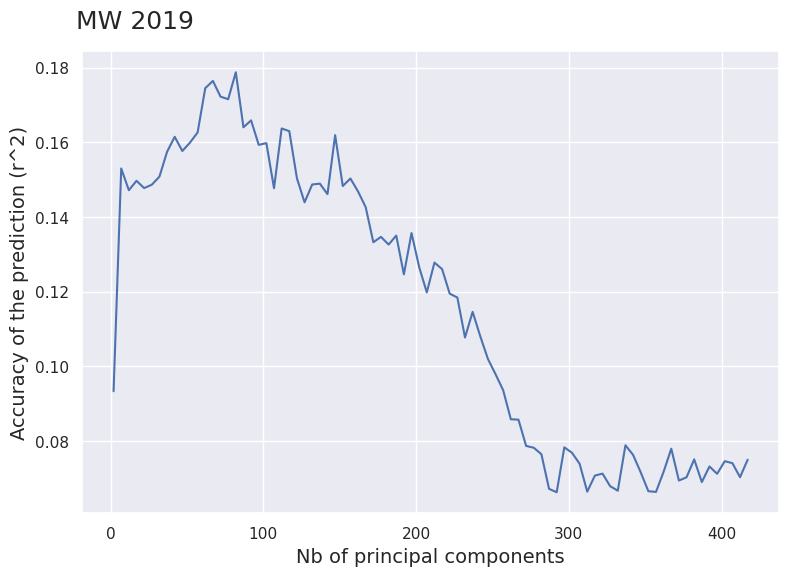

In [26]:
for country in tqdm(countries) :
    accuracy_pca(complete_df, country, Ridge, withOSM= False, alpha = 1000)